In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten,Conv2D,MaxPooling2D,Dropout
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:3]

array([6, 9, 9], dtype=uint8)

In [ ]:
classes = ['airplane','automobile', 'bird','cat','deer','dog','frog','horse',
           'ship','truck']

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.title(classes[y[index]])

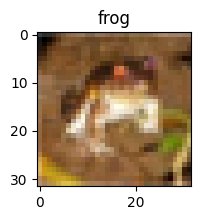

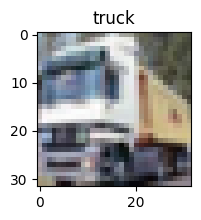

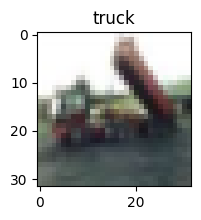

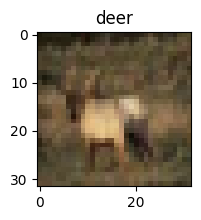

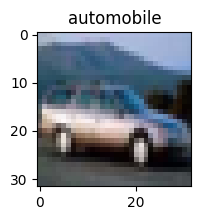

In [ ]:
for i in range(5):
  plot_sample(x_train,y_train,i)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np


In [ ]:
cnn = keras.models.Sequential([

    # cnn
    keras.layers.Conv2D(filters = 32,kernel_size=(2,2),activation='relu',
                  input_shape=(32,32,3),padding = 'same'),
    keras.layers.Conv2D(filters = 32,kernel_size=(2,2),activation='relu',
                  input_shape=(32,32,3),padding = 'same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    # dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dropout(0.50),
    keras.layers.Dense(10,activation = 'softmax')
])

Softmax normalizes the probabilities

1: 0.45

2: 0.67

softmax :

0.45/(0.45+0.67) = 0.40

0.67/(0.45+0.67) = 0.5984




In [ ]:
from keras.optimizers import RMSprop

In [ ]:
cnn.compile(optimizer=RMSprop(lr=0.0005,decay = 1e-6),
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
cnn_history = cnn.fit(x_train,y_train,validation_split=0.20,epochs=15)

Epoch 1/15
1250/1250 [==============================] - 19s 8ms/step - loss: 1.8079 - accuracy: 0.3433 - val_loss: 1.4275 - val_accuracy: 0.5126
Epoch 2/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4960 - accuracy: 0.4592 - val_loss: 1.3070 - val_accuracy: 0.5528
Epoch 3/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3763 - accuracy: 0.5087 - val_loss: 1.1847 - val_accuracy: 0.5929
Epoch 4/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3054 - accuracy: 0.5358 - val_loss: 1.1866 - val_accuracy: 0.5870
Epoch 5/15
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2574 - accuracy: 0.5567 - val_loss: 1.1428 - val_accuracy: 0.6095
Epoch 6/15
1250/1250 [==============================] - 12s 9ms/step - loss: 1.2162 - accuracy: 0.5748 - val_loss: 1.0881 - val_accuracy: 0.6320
Epoch 7/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1949 - accuracy: 0.5809 - val_loss: 1.0744 - val_accura

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0581 - accuracy: 0.6430


[1.0581251382827759, 0.6430000066757202]

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                        

In [ ]:
y_test[:3]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
y_test[:3].reshape(-1,)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:4]

313/313 [==============================] - 1s 2ms/step


array([[3.3749593e-03, 1.0877195e-03, 8.2192617e-03, 7.2323054e-01,
        1.8950844e-03, 1.9718914e-01, 1.4763394e-02, 3.9031960e-03,
        4.2777821e-02, 3.5589046e-03],
       [1.7244697e-02, 3.4656861e-01, 4.8892052e-10, 2.6550581e-10,
        7.5285308e-12, 8.2364962e-14, 9.8801115e-12, 6.3564003e-13,
        6.3217628e-01, 4.0103993e-03],
       [1.1406135e-01, 1.1775404e-01, 2.5848704e-04, 5.8571179e-04,
        1.0843375e-04, 2.9599674e-05, 1.4811183e-05, 5.3040731e-05,
        7.0216447e-01, 6.4970061e-02],
       [5.8143312e-01, 4.0293287e-02, 6.7968867e-03, 2.5704587e-04,
        1.9755559e-03, 1.2736811e-05, 3.0121478e-04, 4.8011229e-05,
        3.4974372e-01, 1.9138461e-02]], dtype=float32)

In [ ]:
np.argmax([2,3,12])
# returns the index of the maximum number

2

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]

[3, 8, 8, 0, 6]

In [ ]:
y_classes[-14:]

[8, 8, 1, 4, 7, 0, 3, 5, 3, 5, 3, 5, 1, 7]

In [ ]:
y_act = [np.argmax(i) for i in y_test]

In [ ]:
y_act[-14:]

[8, 0, 8, 2, 7, 0, 3, 5, 3, 8, 3, 5, 1, 7]

In [ ]:
def accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f"{history}  Accuracy ")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(['Train','Test'],loc='best')
  plt.show()


def loss_plot(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f"{history} Loss ")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend(['Train','Test'],loc='best')
  plt.show()


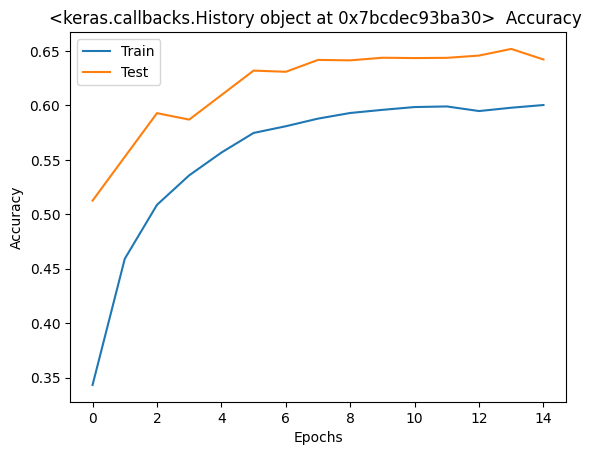

In [ ]:
accuracy(cnn_history)

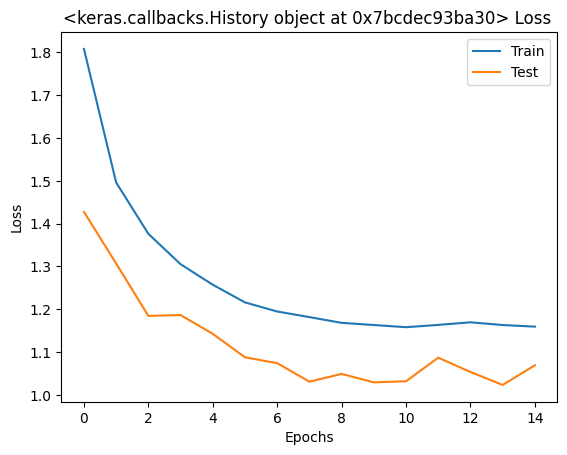

In [ ]:
loss_plot(cnn_history)

In [ ]:
print(classification_report(y_act,y_classes))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1000
           1       0.75      0.78      0.77      1000
           2       0.61      0.43      0.51      1000
           3       0.40      0.53      0.46      1000
           4       0.64      0.55      0.59      1000
           5       0.59      0.52      0.55      1000
           6       0.73      0.71      0.72      1000
           7       0.69      0.68      0.69      1000
           8       0.69      0.78      0.73      1000
           9       0.73      0.75      0.74      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000



# Model 2

In [ ]:
cnn_2 = keras.models.Sequential([

    # cnn
    keras.layers.Conv2D(filters = 32,kernel_size=(1,1),activation='relu',
                  input_shape=(32,32,3),padding = 'same'),
    keras.layers.Conv2D(filters = 32,kernel_size=(1,1),activation='relu',
                  input_shape=(32,32,3),padding = 'same'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters = 32,kernel_size=(1,1),activation='relu',
                  input_shape=(32,32,3),padding = 'same'),
    keras.layers.Conv2D(filters = 32,kernel_size=(1,1),activation='relu',
                  input_shape=(32,32,3),padding = 'same'),
    keras.layers.MaxPooling2D((2,2)),

    # dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dropout(0.50),
    keras.layers.Dense(10,activation = 'softmax')
])

In [ ]:
cnn_2.compile(optimizer=RMSprop(lr=0.0005,decay = 1e-6),
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
cnn_2_history = cnn_2.fit(x_train,y_train,validation_split=0.20,epochs=15)

Epoch 1/15
1250/1250 [==============================] - 7s 5ms/step - loss: 2.4720 - accuracy: 0.1135 - val_loss: 2.2134 - val_accuracy: 0.1737
Epoch 2/15
1250/1250 [==============================] - 6s 5ms/step - loss: 2.1912 - accuracy: 0.1477 - val_loss: 2.0327 - val_accuracy: 0.2428
Epoch 3/15
1250/1250 [==============================] - 6s 4ms/step - loss: 2.0383 - accuracy: 0.2184 - val_loss: 1.8258 - val_accuracy: 0.3298
Epoch 4/15
1250/1250 [==============================] - 7s 5ms/step - loss: 1.9387 - accuracy: 0.2648 - val_loss: 1.7705 - val_accuracy: 0.3476
Epoch 5/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.8665 - accuracy: 0.3032 - val_loss: 1.7035 - val_accuracy: 0.4051
Epoch 6/15
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8091 - accuracy: 0.3357 - val_loss: 1.6488 - val_accuracy: 0.4253
Epoch 7/15
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7593 - accuracy: 0.3566 - val_loss: 1.5947 - val_accurac

In [ ]:
cnn_2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4704 - accuracy: 0.4746


[1.47044038772583, 0.4745999872684479]

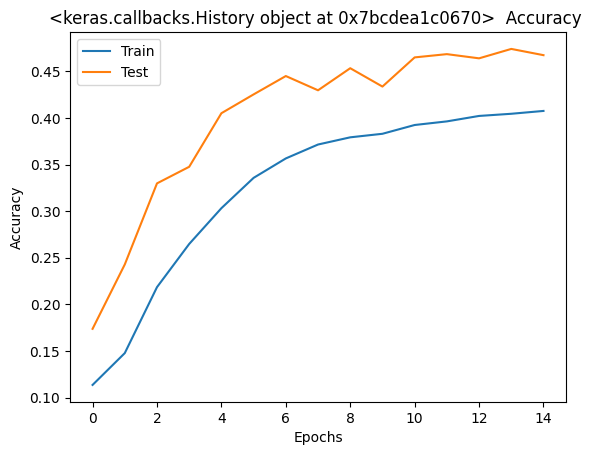

In [ ]:
accuracy(cnn_2_history)

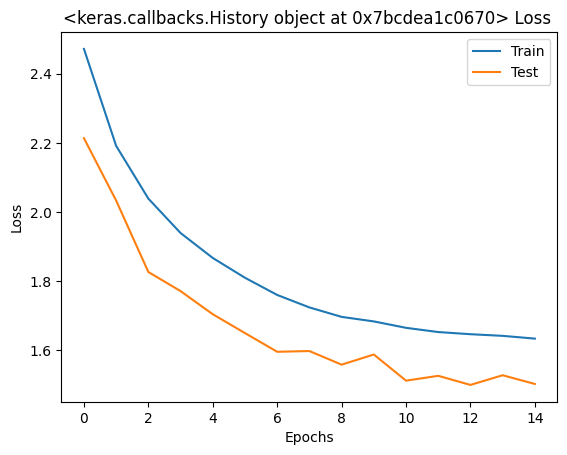

In [ ]:
loss_plot(cnn_2_history)

In [ ]:
cnn_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        128       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        1056      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        1056      
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        1056      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

In [ ]:
cnn_3 = keras.models.Sequential([

    # cnn
    keras.layers.Conv2D(filters = 32,kernel_size=(3,3),activation='relu',
                  input_shape=(32,32,3),padding = 'same'),
    keras.layers.Conv2D(filters = 32,kernel_size=(3,3),activation='relu',
                  input_shape=(32,32,3),padding = 'same'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters = 32,kernel_size=(1,1),activation='relu',
                  input_shape=(32,32,3),padding = 'same'),
    keras.layers.Conv2D(filters = 32,kernel_size=(1,1),activation='relu',
                  input_shape=(32,32,3),padding = 'same'),
    keras.layers.MaxPooling2D((2,2)),

    # dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dropout(0.50),
    keras.layers.Dense(10,activation = 'softmax')
])

In [ ]:
cnn_3.compile(optimizer='adam',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])